In [17]:
import numpy as np
import pandas as pd
import sklearn.metrics as m
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
# cross validation
from sklearn.model_selection import cross_val_score
# grid search
from sklearn.model_selection import GridSearchCV
# outlier
from sklearn.neighbors import LocalOutlierFactor
# imbalance handling
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [18]:
df = pd.read_pickle('dataset\cleaned_dementia_dataset.pkl')

In [19]:
X_cols = ['Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [20]:
X = df[X_cols]
y = LabelEncoder().fit_transform(df['Group'])

In [21]:
model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

model2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

In [24]:

model2.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('clf', GradientBoostingClassifier())])

In [25]:
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
df_pred = pd.DataFrame({'y':y_test, 'y_pred':y_pred, 'y_pred2':y_pred2})
df_pred

,y,y_pred,y_pred2
0,0,0,0
1,0,0,0
2,1,1,1
3,0,2,2
4,0,0,0
...,...,...,...
109,1,1,1
110,1,1,1
111,0,0,0
112,2,2,2


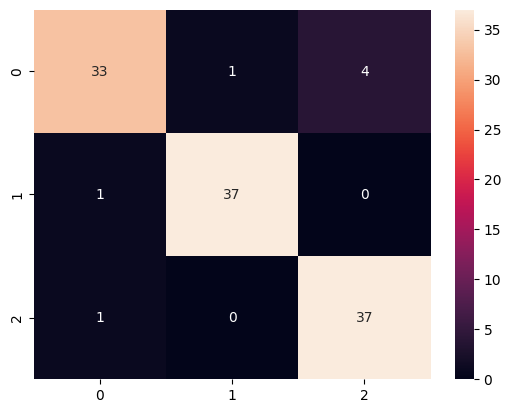

In [29]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<Axes: >

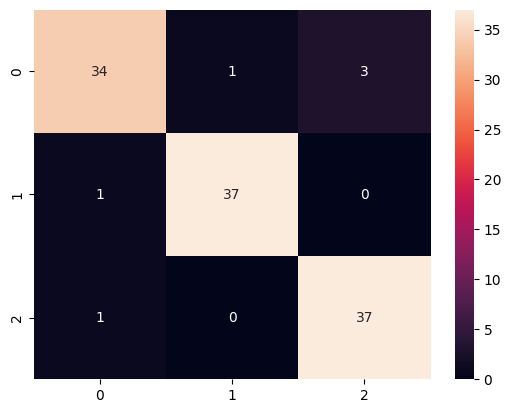

In [30]:
sns.heatmap(cm2, annot=True, fmt='d')

In [31]:
print("Random Forest Classifier")
print(classification_report(y_test, y_pred))

print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred2))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.97      0.97      0.97        38
           2       0.90      0.97      0.94        38

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.97      0.97      0.97        38
           2       0.93      0.97      0.95        38

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [32]:
# save model
import joblib
joblib.dump(model, 'rf_model.pkl')
joblib.dump(model2, 'gb_model2.pkl')

['gb_model2.pkl']

In [37]:
def predict(model, visit, mr_delay, mf, age, educ, ses, mmse, cdr, etiv, nwbv, asf):
    data = pd.DataFrame({
        'Visit': [visit],
        'MR Delay': [mr_delay],
        'M/F': [mf],
        'Age': [age],
        'EDUC': [educ],
        'SES': [ses],
        'MMSE': [mmse],
        'CDR': [cdr],
        'eTIV': [etiv],
        'nWBV': [nwbv],
        'ASF': [asf]
    })
    return model.predict(data)[0]

In [36]:
# test 
predict(model, 1, 0, 1, 74, 12, 2, 29, 0, 1344, 0.743, 1.147)

array([2])

In [40]:
for i in X_test.iterrows():
    result = predict(model, i[1]['Visit'], i[1]['MR Delay'], i[1]['M/F'], i[1]['Age'], i[1]['EDUC'], i[1]['SES'], i[1]['MMSE'], i[1]['CDR'], i[1]['eTIV'], i[1]['nWBV'], i[1]['ASF'])
    print(result)

0
0
1
2
0
0
0
2
0
0
2
2
1
1
2
1
1
2
0
2
2
2
1
1
0
2
1
1
1
1
0
0
0
0
2
0
1
1
0
0
1
1
0
2
2
2
1
0
2
2
1
1
0
0
2
1
2
2
1
1
1
2
0
1
2
1
1
0
2
1
2
2
1
2
2
2
0
0
1
0
1
2
0
2
2
0
2
1
1
0
1
0
2
1
0
1
2
2
2
0
2
1
0
0
2
2
2
2
1
1
1
0
2
0


In [47]:
lb =LabelEncoder().fit(df['Group'])
lb.classes_
lb.inverse_transform([0, 1, 2,])

array(['Converted', 'Demented', 'Nondemented'], dtype=object)